# Classification Assignment 4- Predicting the onset of Diabetes within 5 years

In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC


###### Q1. Read the dataset

In [2]:
df=pd.read_csv('Diabetes.csv')


In [3]:
df.head()


,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
No. of times pregnant                             768 non-null int64
Plasma glucose concentration                      768 non-null int64
Diastolic blood pressure (mm Hg)                  768 non-null int64
Triceps skin fold thickness (mm)                  768 non-null int64
2-Hour serum insulin (mu U/ml)                    768 non-null int64
Body mass index (weight in kg/(height in m)^2)    768 non-null float64
Diabetes pedigree function                        768 non-null float64
Age (years)                                       768 non-null int64
Class variable (0 or 1)                           768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()


,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###### Q2. Lookout for missing values 


In [6]:
df.isna().any()


No. of times pregnant                             False
Plasma glucose concentration                      False
Diastolic blood pressure (mm Hg)                  False
Triceps skin fold thickness (mm)                  False
2-Hour serum insulin (mu U/ml)                    False
Body mass index (weight in kg/(height in m)^2)    False
Diabetes pedigree function                        False
Age (years)                                       False
Class variable (0 or 1)                           False
dtype: bool

In [7]:
df.isnull().sum()

No. of times pregnant                             0
Plasma glucose concentration                      0
Diastolic blood pressure (mm Hg)                  0
Triceps skin fold thickness (mm)                  0
2-Hour serum insulin (mu U/ml)                    0
Body mass index (weight in kg/(height in m)^2)    0
Diabetes pedigree function                        0
Age (years)                                       0
Class variable (0 or 1)                           0
dtype: int64

###### There are no missing values  in the given dataset

###### Q3. Report differences between mean and median in the features

In [8]:
pd.DataFrame(df.drop(['Class variable (0 or 1)'], axis=1).apply(lambda x : [x.mean(), x.median(), x.mean()-x.median()]).tolist(),
            index=df.drop(['Class variable (0 or 1)'],axis=1).columns,
            columns=['Mean','Median','Discrepancy'])


,Mean,Median,Discrepancy
No. of times pregnant,3.845052,3.0000,0.845052
Plasma glucose concentration,120.894531,117.0000,3.894531
Diastolic blood pressure (mm Hg),69.105469,72.0000,-2.894531
Triceps skin fold thickness (mm),20.536458,23.0000,-2.463542
2-Hour serum insulin (mu U/ml),79.799479,30.5000,49.299479
Body mass index (weight in kg/(height in m)^2),31.992578,32.0000,-0.007422
Diabetes pedigree function,0.471876,0.3725,0.099376
Age (years),33.240885,29.0000,4.240885


###### Q4.Visualize the feature relationships


###### a. Pairplot

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


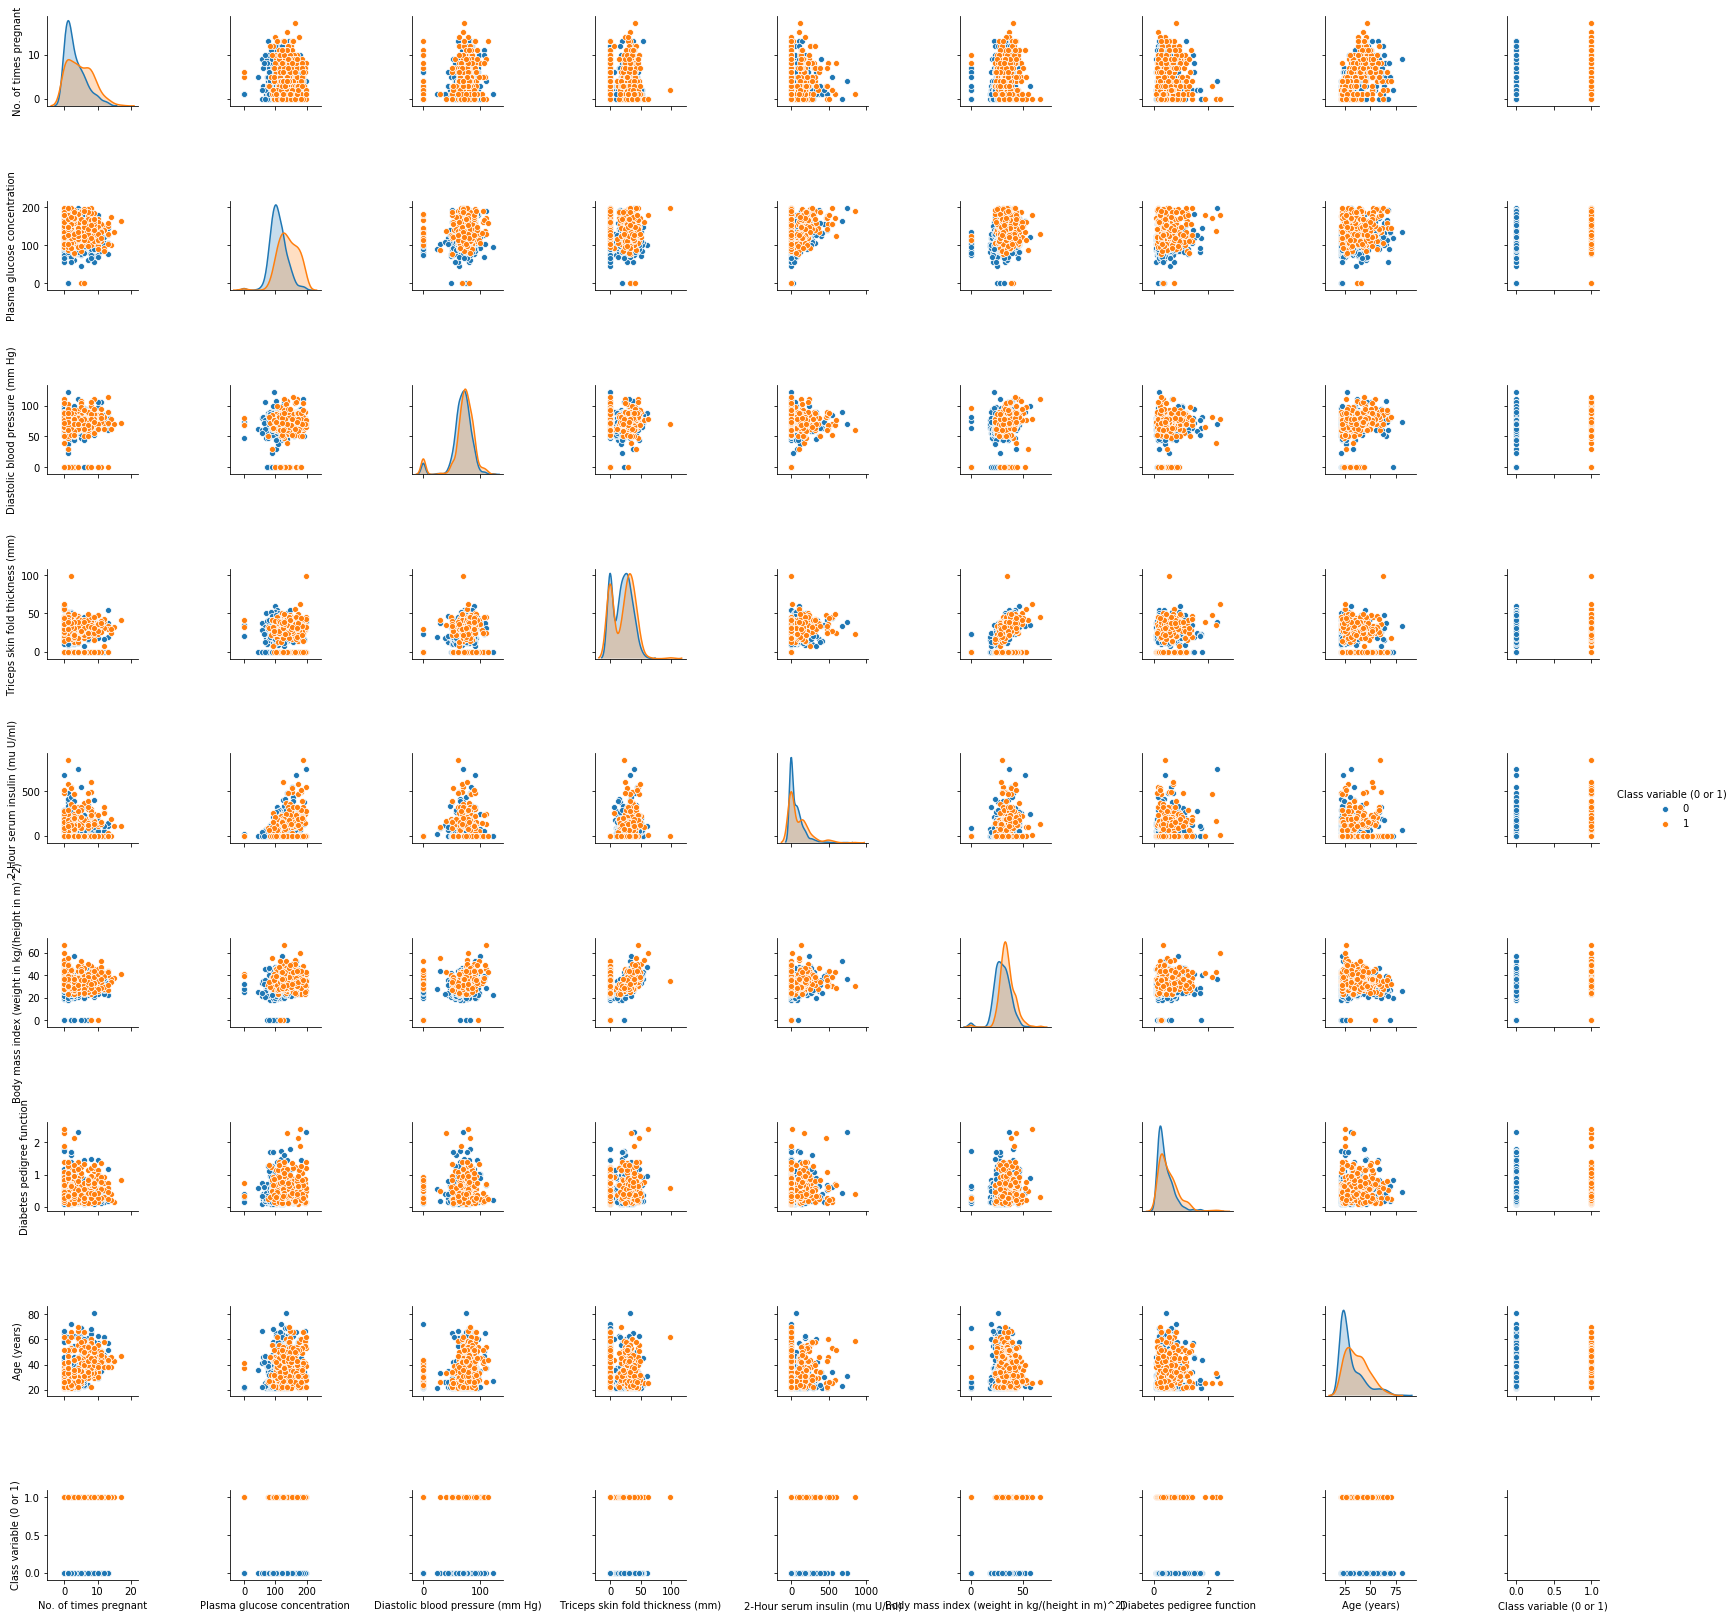

In [9]:
sns.pairplot(df, hue='Class variable (0 or 1)')


###### b. Heatmap: Correlation between all the features and target

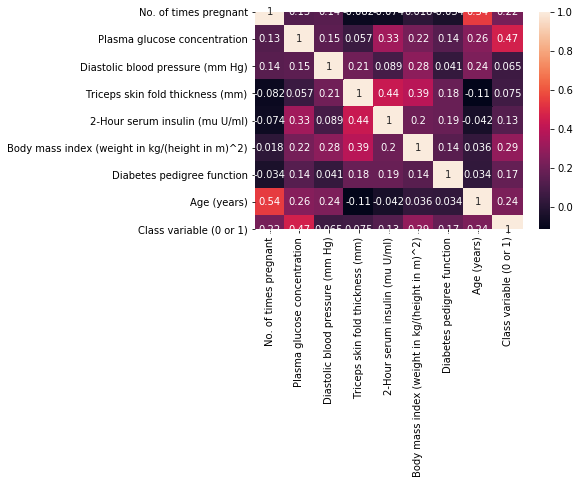

In [10]:
sns.heatmap(df.corr(),annot=True)

###### Q5. Split the Data


###### a. Scale the features: Using MinMaxScaler

In [11]:
minmax_scale = preprocessing.MinMaxScaler().fit(df.iloc[:,:-1])
df.iloc[:,:-1] = minmax_scale.transform(df.iloc[:,:-1])

###### b. Divide into features and target 

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

###### c. Divide into training and testing & d.Ensure that data is divided with more or less equal ration of class 1 and 0 in both test and train set: stratify=y

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)


###### Q6. Implement the SVM Model

###### a. Train the model

In [14]:
model = SVC()
model.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

###### b. Predict

In [15]:
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.7272727272727273

###### Q7. Measure Accuracy

###### a. Confusion Matrix

In [16]:
matrix = confusion_matrix(y_test, y_pred)
print('Accuracy is : ' + str(accuracy_score(y_test, y_pred)))
print (matrix)

Accuracy is : 0.7272727272727273
[[136  14]
 [ 49  32]]


###### b. Classification Report 

In [17]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.74      0.91      0.81       150
           1       0.70      0.40      0.50        81

    accuracy                           0.73       231
   macro avg       0.72      0.65      0.66       231
weighted avg       0.72      0.73      0.70       231



###### c. Cross Tab with True and Predicted Labels 

In [18]:
cross_tab = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print (cross_tab)

Predicted    0   1  All
Actual                 
0          136  14  150
1           49  32   81
All        185  46  231


###### Completed